###### Case - 1: Resturant Revenue Prediction (Tab Food Investment - Kaggle Dataset)¶

In [95]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
from datetime import date

Read Files 

In [96]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [97]:
train = train.drop('Id',axis = 1)
test = test.drop('Id',axis=1)

Exploratory Data Analysis 

In [98]:
train.head()

,OpenDate,City,CityGroup,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131
2,03-09-2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379
3,02-02-2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,05-09-2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [99]:
train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [100]:
print(train.describe(include = 'object'))

          OpenDate      City   CityGroup Type
count          137       137         137  137
unique         134        34           2    3
top     02-02-2012  İstanbul  Big Cities   FC
freq             2        50          78   76


In [101]:
print(train.shape)
print(test.shape)

(137, 42)
(100000, 41)


In [102]:
train.columns

Index(['OpenDate', 'City', 'CityGroup', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')

In [103]:
print(train.describe(include = 'object'))
print(test.describe(include = 'object'))

          OpenDate      City   CityGroup Type
count          137       137         137  137
unique         134        34           2    3
top     02-02-2012  İstanbul  Big Cities   FC
freq             2        50          78   76
          OpenDate      City CityGroup    Type
count       100000    100000    100000  100000
unique         310        57         2       4
top     07-10-2013  İstanbul     Other      FC
freq           645     34087     50728   57019


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = pd.DataFrame(train.corr())
corr.to_csv("corr2.csv",index=False)

In [105]:
#train = train.drop(['P25','P4','P19','P24','P20','P14','P15','P26','P27','P37','P3','P5','P33','P18','P16'],axis = 1)

In [106]:
#test = test.drop(['P25','P4','P19','P24','P20','P14','P15','P26','P27','P37','P3','P5','P33','P18','P16'],axis = 1)

In [107]:
#train.columns

In [108]:
train['today'] = date.today()
test['today'] = date.today()

In [109]:
train['OpenDate'] = pd.to_datetime(train['OpenDate'])
train['today'] = pd.to_datetime(train['today'])
test['OpenDate'] = pd.to_datetime(test['OpenDate'])
test['today'] = pd.to_datetime(test['today'])

In [110]:
train['OpenDate'] = train['OpenDate'].apply(lambda x: x.strftime('%Y')) 
train['today'] = train['today'].apply(lambda x: x.strftime('%Y')) 
test['OpenDate'] = test['OpenDate'].apply(lambda x: x.strftime('%Y')) 
test['today'] = test['today'].apply(lambda x: x.strftime('%Y')) 

In [111]:
train['OpenDate'] = train['OpenDate'].astype('int64')
train['today'] = train['today'].astype('int64')
train['Age'] = train['today'] - train['OpenDate']

In [112]:
test['OpenDate'] = test['OpenDate'].astype('int64')
test['today'] = test['today'].astype('int64')
test['Age'] = test['today'] - test['OpenDate']

In [113]:
train = train.drop(['City','OpenDate','today'],axis = 1)
test = test.drop(['City','OpenDate','today'],axis = 1)

In [114]:
print(train['Type'].unique())
print(test['Type'].unique())

['IL' 'FC' 'DT']
['FC' 'IL' 'DT' 'MB']


In [115]:
train['Type'] = train['Type'].replace('IL','others')
train['Type'] = train['Type'].replace('DT','others')
train['Type'].unique()

array(['others', 'FC'], dtype=object)

In [116]:
test['Type'] = test['Type'].replace(['IL','DT','MB'], 'others')
test['Type'].unique()

array(['FC', 'others'], dtype=object)

In [117]:
train['Age'].describe()

count    137.000000
mean      11.321168
std        4.027359
min        6.000000
25%        9.000000
50%       10.000000
75%       13.000000
max       24.000000
Name: Age, dtype: float64

Studing the relation of Revenue variable with other numeric variable 

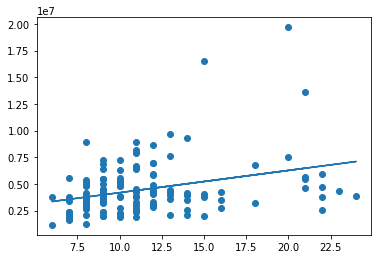

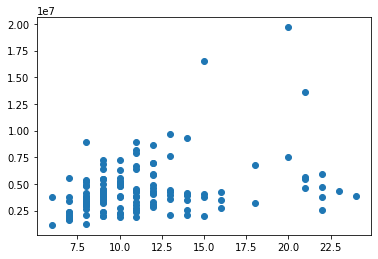

In [118]:
import matplotlib.pyplot as plt
from scipy import stats
x = train['Age']
y = train['revenue']
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
plt.scatter(train['Age'], train['revenue'])
plt.show()

In [119]:
train.dtypes

CityGroup     object
Type          object
P1             int64
P2           float64
P3           float64
P4           float64
P5             int64
P6             int64
P7             int64
P8             int64
P9             int64
P10            int64
P11            int64
P12            int64
P13          float64
P14            int64
P15            int64
P16            int64
P17            int64
P18            int64
P19            int64
P20            int64
P21            int64
P22            int64
P23            int64
P24            int64
P25            int64
P26          float64
P27          float64
P28          float64
P29          float64
P30            int64
P31            int64
P32            int64
P33            int64
P34            int64
P35            int64
P36            int64
P37            int64
revenue        int64
Age            int64
dtype: object

Splitting categorical and numeric variables

In [120]:
cat_attr_train = list(train.select_dtypes("object").columns)
num_attr_float_train = list(train.select_dtypes(include=['float64']).columns)
num_float_train = list(['P1', 'P3', 'P4', 'P14', 'P21', 'P22', 'P27', 'P29'])
num_attr_train = list(train.select_dtypes(include=['int64']).columns)

In [121]:
num_attr_float_train
num_float_train

['P1', 'P3', 'P4', 'P14', 'P21', 'P22', 'P27', 'P29']

In [122]:
cat_attr_test = list(test.select_dtypes("object").columns)
num_attr_float_test = list(test.select_dtypes(include=['float64']).columns)
num_float_test = list(['P1', 'P3', 'P4', 'P14', 'P21', 'P22', 'P27', 'P29'])
num_attr_test = list(test.select_dtypes(include=['int64']).columns)

In [123]:
num_attr_float_test

['P2', 'P3', 'P4', 'P13', 'P26', 'P27', 'P28', 'P29']

In [124]:
for col in cat_attr_train:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [125]:
cat_attr_train

['CityGroup', 'Type']

In [126]:
for col in cat_attr_train:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [127]:
cat_attr_test

['CityGroup', 'Type']

In [128]:
train.isnull().sum()

CityGroup    0
Type         0
P1           0
P2           0
P3           0
P4           0
P5           0
P6           0
P7           0
P8           0
P9           0
P10          0
P11          0
P12          0
P13          0
P14          0
P15          0
P16          0
P17          0
P18          0
P19          0
P20          0
P21          0
P22          0
P23          0
P24          0
P25          0
P26          0
P27          0
P28          0
P29          0
P30          0
P31          0
P32          0
P33          0
P34          0
P35          0
P36          0
P37          0
revenue      0
Age          0
dtype: int64

In [129]:
test.isnull().sum()

CityGroup    0
Type         0
P1           0
P2           0
P3           0
P4           0
P5           0
P6           0
P7           0
P8           0
P9           0
P10          0
P11          0
P12          0
P13          0
P14          0
P15          0
P16          0
P17          0
P18          0
P19          0
P20          0
P21          0
P22          0
P23          0
P24          0
P25          0
P26          0
P27          0
P28          0
P29          0
P30          0
P31          0
P32          0
P33          0
P34          0
P35          0
P36          0
P37          0
Age          0
dtype: int64

Standardising Numeric Variables & Dummification of categorical Variables  

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
scaler = StandardScaler()
train_num = pd.DataFrame(scaler.fit_transform(train[num_attr_train]),columns = num_attr_train)
train_num_float = pd.DataFrame(scaler.fit_transform(train[num_attr_float_train]),columns = num_attr_float_train)
test_num = pd.DataFrame(scaler.fit_transform(test[num_attr_test]),columns = num_attr_test)
test_float = pd.DataFrame(scaler.fit_transform(test[num_float_test]),columns = num_float_test)

In [131]:
cat_attr_train

['CityGroup', 'Type']

In [132]:
cat_attr_test

['CityGroup', 'Type']

In [133]:
#ohe = OneHotEncoder() 
#train_cat = pd.get_dummies(train[cat_attr_train], columns=cat_attr_train, drop_first=True)
#test_cat = pd.get_dummies(test[cat_attr_test], columns=cat_attr_test, drop_first=True)

In [134]:
test.shape

(100000, 40)

In [135]:
train.shape

(137, 41)

In [136]:
train.head(2)

,CityGroup,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Age
0,Big Cities,others,4,5.0,4.0,4.0,2,2,5,4,...,5,3,4,5,5,4,3,4,5653753,21
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,6923131,12


In [137]:
train_1 = pd.concat([train_num,train_num_float],axis = 1)
test = pd.concat([test_num,test_float],axis = 1)

In [138]:
from sklearn.model_selection import train_test_split
y = train['revenue']
x= train_1.drop(['revenue'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20,random_state=123)

In [139]:
X_train.head()

,P1,P5,P6,P7,P8,P9,P10,P11,P12,P14,...,P37,Age,P2,P3,P4,P13,P26,P27,P28,P29
60,2.753825,-0.006056,1.242615,1.999921,1.537293,2.491539,2.450529,1.437785,2.429860,1.685519,...,0.495013,-0.827678,2.048046,1.635760,1.607252,2.343005,1.356093,0.657454,0.772648,2.606351
33,-0.694749,-0.006056,-0.638471,-0.185001,-0.082777,-0.243564,-0.265672,-1.188569,-0.154696,-0.520686,...,-0.625925,-1.076891,-0.933348,-0.308701,-0.367578,-0.077747,-0.565156,-0.556444,-0.531493,-0.080631
88,-1.039607,-0.835796,-0.638471,-1.932938,-0.622801,-0.243564,-0.265672,-0.138027,-0.154696,-0.520686,...,-0.625925,-1.076891,-1.595880,0.663530,-0.367578,-0.077747,-0.565156,-0.556444,-0.966207,-0.677738
118,2.753825,-0.006056,3.123701,1.999921,2.617340,2.491539,2.450529,0.387243,2.429860,0.582417,...,0.495013,-0.080039,2.048046,3.094106,0.126130,2.343005,2.316718,1.871352,2.946216,1.113583
62,-0.694749,-0.006056,-0.168199,-0.185001,-0.082777,-0.243564,-0.808913,-0.663298,-0.154696,0.950117,...,1.055482,-0.329252,-0.270816,-0.308701,-0.367578,-1.046047,0.587594,-0.070885,-0.531493,-0.080631


Model - 1: Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
train_pred = lin_reg.predict(X_train)
val_pred = lin_reg.predict(X_test)


In [141]:
r_sq = lin_reg.score(X_train,y_train)
print('coefficient of determination:', r_sq)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, train_pred))

coefficient of determination: 0.3788325539716205


1734392.9303000194

In [142]:
r_sq = lin_reg.score(X_test,y_test)
print('coefficient of determination:', r_sq)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, val_pred))

coefficient of determination: 0.024956143253003212


3560853.856774812

In [143]:
test_pred
pd.DataFrame(test_pred).to_csv("lin_reg.csv",index=True)

In [144]:
lin_reg.coef_

array([ 1165042.67978701,  -191245.7273301 ,   484509.24095905,
         285800.51176401, -2566996.90422243,   802487.63384421,
        1251137.1429935 ,  -536702.90815306,   270684.51094585,
       -1461111.89988474,   566533.38497551, -2478777.15341544,
         732198.34176812,  1934069.55928737,  -410174.17953407,
       -1937185.91944834,    88160.50037786,  -172483.15371805,
         868283.74146465,  1746832.86394895,  1180325.91502999,
        1048466.35077066,  -380963.87604347,  -130051.72775219,
         -94245.11882347,  1043488.83082171, -1008199.64160586,
         655402.04500857,    10522.61551712,   643451.78428521,
         169097.70088223,  -223729.08756036,    32843.93904868,
        -824705.23525254, -3935346.32556873,   673462.24241171,
        1252403.53994313,   -10750.57194527])

In [145]:
X_train.shape

(109, 38)

In [146]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.123
Date:                Fri, 01 May 2020   Prob (F-statistic):              0.331
Time:                        19:52:10   Log-Likelihood:                -1720.6
No. Observations:                 109   AIC:                             3519.
Df Residuals:                      70   BIC:                             3624.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.427e+06   2.23e+05     19.807      0.0

Model - 2: Lasso

In [147]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)
Lasso(alpha=0.1)
#print(clf.coef_)
print(clf.intercept_)

4428239.718179291


C:\Users\bharati\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163925383729616.03, tolerance: 52785276384.64829
  positive)


Model - 3: Elastic Net

In [148]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(X_train,y_train)
print(ENreg.coef_)
train_pred_en = ENreg.predict(X_train)
val_pred_en = ENreg.predict(X_test)
test_pred_en = ENreg.predict(test)

[  18709.38667088 -124550.91163836  168951.78525782  106319.0147737
 -181159.51990322  -16243.70332885  -17801.92858091   10654.10780565
   -9463.65815149  -64236.15492542  -68078.70530851  -51397.61086593
   45654.47000223   46398.43680884  -12426.14357444 -232311.95863152
  116820.8256379    -3627.10252203  148655.36239532   51071.21929193
   26186.43117328  -63976.2798129   -54495.52194345  -78966.24800742
  -12714.08620526 -114915.53864918    2146.58849329  -69019.12026065
   44193.41171536  351033.26051638  239942.6513365   -61275.26723395
   56871.52342822  -15622.21349025  -67564.03552026  102305.01012526
  217735.9241891   -27619.09026971]


In [149]:
print(np.sqrt(mean_squared_error(y_train, train_pred_en)))
print(np.sqrt(mean_squared_error(y_test, val_pred_en)))


1979255.9219396512
3433869.252233615


In [150]:
test_pred_en
pd.DataFrame(test_pred_en).to_csv("rr_en.csv",index=True)

###### Data Engineering - PCA 

In [151]:
#pca
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(X_train)
#print(pca.components_)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
pca_samples = pca.transform(X_train)
X_train = pd.DataFrame(pca_samples)
pca_samples = pca.transform(X_test)
X_test = pd.DataFrame(pca_samples)
pca_samples = pca.transform(test)
test = pd.DataFrame(pca_samples)
print(X_train.head(2))
print(X_test.head(2))
print(test.head(2))

print(X_train.shape)
print(X_test.shape)
print(test.shape)

           0         1         2         3         4         5         6  \
0  11.263530  0.691185 -1.119652  0.026884 -1.129029 -0.553420 -2.201815   
1  -3.108447  0.020232 -1.165218 -0.099659 -0.245037 -0.688334  0.227414   

          7  
0 -1.285372  
1  0.403406  
          0         1         2         3         4         5         6  \
0  2.349084 -3.681716  3.228123  0.125229  1.120599  1.866335  0.890979   
1 -1.526645 -3.278221 -2.118837 -0.055386 -1.409641  0.107523  1.691089   

          7  
0  0.362976  
1 -0.441195  
          0         1         2         3         4         5         6  \
0 -2.637869 -0.099881  0.219465  1.015845 -0.845161  0.868017 -0.660505   
1 -2.809493 -0.191738  0.245897  0.349648 -0.125663 -0.338675 -0.268553   

          7  
0  0.622366  
1  0.060808  
(109, 8)
(28, 8)
(100000, 8)


###### Model - 4: Lin Regression with PCA 

In [152]:
from sklearn.linear_model import LinearRegression
lin_reg_pca = LinearRegression()
model = lin_reg_pca.fit(X_train,y_train)
train_pred_pca = lin_reg_pca.predict(X_train)
val_pred_pca = lin_reg_pca.predict(X_test)
test_pred_pca = lin_reg_pca.predict(test)

In [153]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, train_pred))
#1790536

1734392.9303000194

In [154]:
np.sqrt(mean_squared_error(y_test, val_pred))

3560853.856774812

In [155]:
test_pred
pd.DataFrame(test_pred).to_csv("lin_pca.csv",index=True)

###### Model - 5 : Gradient Boosting 

In [156]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gb= ensemble.GradientBoostingRegressor(**params)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [157]:
train_pred_gb = gb.predict(X_train)
val_pred_gb = gb.predict(X_test)
test_pred_gb = gb.predict(test)

In [158]:
np.sqrt(mean_squared_error(y_train, train_pred_gb))

395417.07790390303

In [159]:
np.sqrt(mean_squared_error(y_test, val_pred_gb))

3219934.4649915695

In [160]:
test_pred
pd.DataFrame(test_pred).to_csv("gradient_boosting.csv",index=True)

In [161]:
y_train.shape

(109,)

###### Model - 6: XG Boost with grid search 

In [162]:
from sklearn.model_selection import GridSearchCV
#xgb1 = XGBRegressor()

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "loss":['ls'],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt",'auto'],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100]
    }
clf.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [163]:
best_param = {'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 0.5}
best_param

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 0.5}

In [164]:
#best_param = clf.best_params_
gb_best= ensemble.GradientBoostingRegressor(**best_param)
gb_best.fit(X_train, y_train)
train_pred_gb_best = gb_best.predict(X_train)
val_pred_gb_best = gb_best.predict(X_test)
test_pred_best = gb_best.predict(test)
print(np.sqrt(mean_squared_error(y_train, train_pred_gb_best)))

print(np.sqrt(mean_squared_error(y_test, val_pred_gb_best)))

1938058.1442880386
3510312.982811607


In [165]:
pd.DataFrame(test_pred_best).to_csv("gradient_boosting_best.csv",index=True)

###### Model - 7: Random Forest Reg

In [166]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
train_pred_rf = rf.predict(X_train)
val_pred_rf = rf.predict(X_test)
test_pred_rf = rf.predict(test)
print(np.sqrt(mean_squared_error(y_train, train_pred_rf)))
print(np.sqrt(mean_squared_error(y_test, val_pred_rf)))

1714782.8713847722
3502726.187233384


In [167]:
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}
clf = GridSearchCV(rf, tuned_parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train,y_train)
best = clf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   18.6s finished


In [168]:
rf_best = RandomForestRegressor(**best)
rf_best.fit(X_train, y_train)
train_pred_rf_best = rf_best.predict(X_train)
val_pred_rf_best = rf_best.predict(X_test)
test_pred_rf_best = rf_best.predict(test)
print(np.sqrt(mean_squared_error(y_train, train_pred_rf_best)))
print(np.sqrt(mean_squared_error(y_test, val_pred_rf_best)))

1772123.639569233
3518814.2658846104


In [169]:
pd.DataFrame(test_pred_rf_best).to_csv("random_forest_best.csv",index=True)

###### Model - 8 : Stacking 

In [1]:
# stacking
#stc = LinearRegression()
#from sklearn.ensemble import StackingRegressor
#stack_train = pd.DataFrame([train_pred_en,train_pred_pca,train_pred_gb,train_pred_rf])
#stack_val = pd.DataFrame([val_pred_en,val_pred_pca,val_pred_gb,val_pred_rf])
#stack_train = stack_train.T
#stack_test = stack_test.T
#stack_train.columns = ['train_pred_en','train_pred_pca','train_pred_gb','train_pred_rf']
#stack_val.columns = ['val_pred_en','val_pred_pca','val_pred_gb','val_pred_rf']
#final_lr = LinearRegression()

#final_lr.fit(stack_train,y_train)

#stacked_pred_train = final_lr.predict(stack_train)
#stacked_pred_val = final_lr.predict(stack_test)
#stacked_pred_test = final_lr.predict(test)
#print(np.sqrt(mean_squared_error(y_train, stacked_pred_train)))
#print(np.sqrt(mean_squared_error(y_test, stacked_pred_val)))

Kaggle Dataset
Kaggle Dataset: Resturant Revenue Prediction
Tab Food Investment(TFI) is a quick service restaurants across the globe with some of 
the world's most well-known brands such as Burger King, Sbarro, Popeyes, 
Usta Donerci, and Arby’s. With over 1200 outlets, they currently employ over 
20,000 people in Europe and Asia and make significant daily investments 
in developing new restaurant sites.

With investments in opening new outlets, the objective of the current exercise is to 
find a mathematical model to increase the effectiveness of investments 
in new restaurant sites would allow TFI to invest more in other important 
business areas, like sustainability, innovation, and training for new 
employees. Using demographic, real estate, and commercial data, this 
competition challenges you to predict the annual restaurant sales of 
100,000 regional locations.

Data description: 
TFI has provided a dataset with 137 restaurants in the training set, 
and a test set of 100000 restaurants. The data columns include the 
open date, location, city type, and three categories of obfuscated 
data: Demographic data, Real estate data, and Commercial data. 
The revenue column indicates a (transformed) revenue of the restaurant 
in a given year and is the target of predictive analysis. 

Data Fields: 

Id : Restaurant id. 
Open Date : opening date for a restaurant
City : City that the restaurant is in. Note that there are unicode in 
the names. 
City Group: Type of the city. Big cities, or Other. 
Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, 
MB: Mobile
P1, P2 - P37: There are three categories of these obfuscated data. 
Demographic data are gathered from third party providers with GIS systems. 
These include population in any given area, age and gender distribution, 
development scales. Real estate data mainly relate to the m2 of the location, 
front facade of the location, car park availability. Commercial data mainly 
include the existence of points of interest including schools, banks, other 
QSR operators.
Revenue: The revenue column indicates a (transformed) revenue of the 
restaurant in a given year and is the target of predictive analysis. 
Please note that the values are transformed so they don't mean real dollar 
values. 

Experiments conducted:

Steps in Data Processing: 

1. Type Column: Converted categories into two (instead of four) types 
    (Food Court and Others)
2. Calculated Age of current resturants (from OpenDate Column)
3. Data Standardisation for numerical columns using StandardScaler
4. Dummified the categorical variables
5. Data was split into 80:20 for training and validation 
6. PCA for all variables between P1, P2-P37

Models Applied: 
Linear Regression(with and without PCA), 
Elastic Net, 
Gradient Boosting,
XGBoost with Grid SearchCV, 
Random Forest

Error Metrics for evaluation - RMSE 


Model Results: 

Linear Models performed better compared to Ensemble Techniques. Linear Reg 
with PCA outperformed the rest. 843 ranking on the Pvt Leaderscoreboard
